# Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv('./data/foodusa.csv', index_col=0)
df_raw.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


In [3]:
scaler = StandardScaler()
df_normalized = df_raw.copy()
df_normalized.iloc[:, :] = scaler.fit_transform(df_raw)
df_normalized.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,-0.322747,0.357765,1.707156,-1.643751,-0.963643
BALTIMORE,0.492987,-0.115920,0.765630,-2.038688,0.609878
BOSTON,1.798161,1.210398,-0.131763,0.072431,1.457158
BUFFALO,-1.016120,-0.711410,0.441980,1.106449,0.327451
CHICAGO,0.574560,-0.697876,0.059485,0.208864,0.327451


In [4]:
cov_mat = df_normalized.cov()
cov_mat

,Bread,Burger,Milk,Oranges,Tomatoes
Bread,1.045455,0.712687,0.343159,0.038378,0.399616
Burger,0.712687,1.045455,0.348577,0.220525,0.660621
Milk,0.343159,0.348577,1.045455,-0.002905,0.265981
Oranges,0.038378,0.220525,-0.002905,1.045455,0.374337
Tomatoes,0.399616,0.660621,0.265981,0.374337,1.045455


In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
eigenvectors = eigenvectors.T
eigenvalues, eigenvectors

(array([2.53258013, 1.15488739, 0.25170918, 0.77204783, 0.5160482 ]),
 array([[ 0.49614868,  0.57570231,  0.33956956,  0.22498981,  0.50643404],
        [ 0.30861972,  0.04380176,  0.43080905, -0.79677694, -0.28702846],
        [ 0.49989887, -0.77263501, -0.00788224,  0.0059668 ,  0.39120139],
        [ 0.38639398,  0.26247227, -0.83463952, -0.29160659,  0.01226602],
        [-0.50930459,  0.02813712, -0.0491    , -0.47901574,  0.71270629]]))

In [6]:
e_indices = np.argsort(eigenvalues)[::-1]
e_indices

array([0, 1, 3, 4, 2])

In [78]:
components = 3

## Compute Solutions

In [87]:
pca = PCA(n_components=components)
sklearn_pca_result = pca.fit_transform(df_normalized)

In [80]:
eigenvectors_sorted = eigenvectors[e_indices]

my_result = np.matmul(df_normalized, eigenvectors_sorted[:components].T)

In [86]:
# Some values in the eigenvectors have flipped signs, when comparing it to the
# solution by scikit-learn.
# https://stats.stackexchange.com/questions/30348/is-it-acceptable-to-reverse-a-sign-of-a-principal-component-score
np.testing.assert_allclose(np.abs(my_result), np.abs(sklearn_pca_result))

# TODO: Are these sign flips supposed to be per entire eigenvector? or can it be (like in my case)
#       only some elements of some eigenvectors?

my_result.head(3)

,0,1,2
City,,,
ATLANTA,-0.232315,2.237819,-0.988156
BALTIMORE,0.288023,1.926235,0.123012
BOSTON,2.298492,0.075243,1.119221


## Explained Variance

In [61]:
explained_variance = eigenvalues / sum(eigenvalues)
explained_variance

array([0.48449359, 0.22093498, 0.04815306, 0.14769611, 0.09872226])

<BarContainer object of 5 artists>

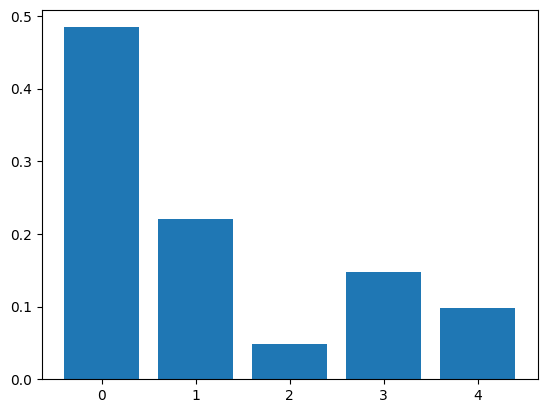

In [62]:
pyplot.bar(range(len(explained_variance)), explained_variance)

## Plot

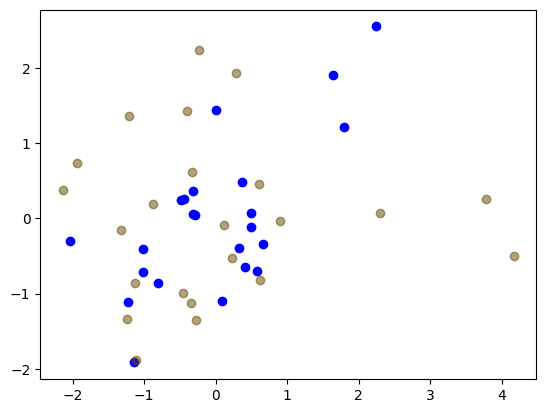

In [88]:
pyplot.scatter(df_normalized.values[:, 0], df_normalized.values[:, 1], color='blue')
pyplot.scatter(my_result.values[:, 0], my_result.values[:, 1], color='red', alpha=0.3)
pyplot.scatter(sklearn_pca_result[:, 0], sklearn_pca_result[:, 1], color='green', alpha=0.3)